# Vector Autoregression Model Exploration & Analysis

### Introduction

Vector Autoregressive Models (VAM) are used for multivariate time series similar to multiple linear regression for non-time series data. In a VAM, the forecast variable (Zillow Home Value Index) is influenced by the predictor variables AND vice versa. It allows for a bi-directional relationship. 

- Forecast Variable: Zillow Home Value Index
- Independent Variables: `MORTGAGE30US`, `MedianCPI`, `HomesForSale`, `HomesSold`, `Unemployment`

#### How it works

- Each variable will have it's own equation comprising of the lags specified.(See below for an example with lags (p) = 1)
- If the series is stationary, forecast by fitting a VAR to the data directly ("VAR in levels"). 
- If the series is not stationary, take differences until it is. Then, fit a VAR ("VAR in differences"). 
- The model is estimated by iterating through each equation by Ordinary Least Squares (OLS). The coefficients are estimated by minimizing the residual sum of squares (RSS).
- After the coefficients are estimated, forecasts are generated from the model in a recursive manner for each variable in the system. 

#### How to choose the parameters

- How many variables should I include?
    - Only ones that are correlated with each other. 
    - The more parameters that are included, the more computationally expensive it will be. 
    - If `K` is the number of parameters to include, and `p` is the number of lags, the number of coefficients to be estimated is equal to `K + pK^2`. 
    - In our case, we have K = 6, and p = 3, so 6 + (3 * 6^2) equals 114 coefficients to be estimated. 
    - The more coefficients that need to be estimated, the larger amount of error should be expected when making the forecast. 
    
- How to choose the number of lags?
    - The Baysian Information Criterion (BIC) should be used to select the number of lags. 

#### System of equations with p = 1

<img src="https://i.upmath.me/svg/ZHVI_%7Bt%7D%3D%20c_%7B10%7D%20%2B%20%5Cphi_%7B11%7DZHVI_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DUnemploymentRate_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7D30yrFixedMortgage_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DCPI_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DHomesSold_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DHomesForSale_%7Bt%E2%88%921%7D%20%2B%20%5Cepsilon_%7B1%2Ct%7D" alt="ZHVI_{t}= c_{10} + \phi_{11}ZHVI_{t−1} + \phi_{1}UnemploymentRate_{t−1} + \phi_{1}30yrFixedMortgage_{t−1} + \phi_{1}CPI_{t−1} + \phi_{1}HomesSold_{t−1} + \phi_{1}HomesForSale_{t−1} + \epsilon_{1,t}" />

<img src="https://i.upmath.me/svg/UnemploymentRate_%7Bt%7D%3D%20c_%7B20%7D%20%2B%20%5Cphi_%7B11%7DUnemploymentRate_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DZHVI_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7D30yrFixedMortgage_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DCPI_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DHomesSold_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DHomesForSale_%7Bt%E2%88%921%7D%20%2B%20%5Cepsilon_%7B2%2Ct%7D" alt="UnemploymentRate_{t}= c_{20} + \phi_{11}UnemploymentRate_{t−1} + \phi_{1}ZHVI_{t−1} + \phi_{1}30yrFixedMortgage_{t−1} + \phi_{1}CPI_{t−1} + \phi_{1}HomesSold_{t−1} + \phi_{1}HomesForSale_{t−1} + \epsilon_{2,t}" />

<img src="https://i.upmath.me/svg/30yrFixedMortgage_%7Bt%7D%3D%20c_%7B30%7D%20%2B%20%5Cphi_%7B11%7D30yrFixedMortgage_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DZHVI_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B11%7DUnemploymentRate_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DCPI_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DHomesSold_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DHomesForSale_%7Bt%E2%88%921%7D%20%2B%20%5Cepsilon_%7B3%2Ct%7D" alt="30yrFixedMortgage_{t}= c_{30} + \phi_{11}30yrFixedMortgage_{t−1} + \phi_{1}ZHVI_{t−1} + \phi_{11}UnemploymentRate_{t−1} + \phi_{1}CPI_{t−1} + \phi_{1}HomesSold_{t−1} + \phi_{1}HomesForSale_{t−1} + \epsilon_{3,t}" />

<img src="https://i.upmath.me/svg/CPI_%7Bt%7D%3D%20c_%7B40%7D%20%2B%20%5Cphi_%7B11%7DCPI_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DZHVI_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B11%7DUnemploymentRate_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7D30yrFixedMortgage_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DHomesSold_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DHomesForSale_%7Bt%E2%88%921%7D%20%2B%20%5Cepsilon_%7B4%2Ct%7D" alt="CPI_{t}= c_{40} + \phi_{11}CPI_{t−1} + \phi_{1}ZHVI_{t−1} + \phi_{11}UnemploymentRate_{t−1} + \phi_{1}30yrFixedMortgage_{t−1} + \phi_{1}HomesSold_{t−1} + \phi_{1}HomesForSale_{t−1} + \epsilon_{4,t}" />

<img src="https://i.upmath.me/svg/HomesSold_%7Bt%7D%3D%20c_%7B50%7D%20%2B%20%5Cphi_%7B11%7DHomesSold_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DZHVI_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B11%7DUnemploymentRate_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7D30yrFixedMortgage_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DCPI_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DHomesForSale_%7Bt%E2%88%921%7D%20%2B%20%5Cepsilon_%7B5%2Ct%7D" alt="HomesSold_{t}= c_{50} + \phi_{11}HomesSold_{t−1} + \phi_{1}ZHVI_{t−1} + \phi_{11}UnemploymentRate_{t−1} + \phi_{1}30yrFixedMortgage_{t−1} + \phi_{1}CPI_{t−1} + \phi_{1}HomesForSale_{t−1} + \epsilon_{5,t}" />

<img src="https://i.upmath.me/svg/HomesForSale_%7Bt%7D%3D%20c_%7B60%7D%20%2B%20%5Cphi_%7B11%7DHomesForSale_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DZHVI_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B11%7DUnemploymentRate_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7D30yrFixedMortgage_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DCPI_%7Bt%E2%88%921%7D%20%2B%20%5Cphi_%7B1%7DHomesSold_%7Bt%E2%88%921%7D%20%2B%20%5Cepsilon_%7B6%2Ct%7D" alt="HomesForSale_{t}= c_{60} + \phi_{11}HomesForSale_{t−1} + \phi_{1}ZHVI_{t−1} + \phi_{11}UnemploymentRate_{t−1} + \phi_{1}30yrFixedMortgage_{t−1} + \phi_{1}CPI_{t−1} + \phi_{1}HomesSold_{t−1} + \epsilon_{6,t}" />

### Import & Prepare Data

Import libraries. 

- `numpy`: In case we need to do any array or matrix math.
- `pandas`: To work with the dataframe.
- `matplotlib`: To plot visualizations. 
- `seaborn`: For prettier plots.

Note: Various modules of the package `statsmodels` will be imported for use later in the notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style = "darkgrid")

Import pickled dataframe.

In [2]:
full_df = pd.read_pickle('fulldataframe.pkl')
full_df.set_index('date', inplace = True)

In [3]:
full_df.head()

,LosAngelesCA,NewYorkNY,RaleighNC,OklahomaCityOK,SaltLakeCityUT,MORTGAGE30US,MedianCPI,HomesForSale,HomesSold,LosAngelesUnemployment,NewYorkUnemployment,RaleighUnemployment,SaltLakeCityUnemployment,OklahomaCityUnemployment
date,,,,,,,,,,,,,,
2000-01-31,240598.0,226266.0,176753.0,91918.0,190020.0,8.25,2.785584,82.0,67.0,5.1,5.1,2.5,3.1,2.9
2000-02-29,241457.0,227618.0,176909.0,92156.0,190141.0,8.31,3.416809,79.0,78.0,5.1,5.0,2.6,3.4,3.0
2000-03-31,242727.0,228829.0,177351.0,92378.0,190386.0,8.23,2.276901,86.0,88.0,5.1,4.8,2.4,3.3,2.8
2000-04-30,245142.0,231213.0,178077.0,92742.0,190866.0,8.13,2.853534,80.0,78.0,5.1,4.1,2.0,2.9,2.2
2000-05-31,247707.0,233418.0,179033.0,93124.0,193543.0,8.62,3.142535,84.0,77.0,5.1,4.3,2.5,3.0,2.7


In [4]:
full_df.columns

Index(['LosAngelesCA', 'NewYorkNY', 'RaleighNC', 'OklahomaCityOK',
       'SaltLakeCityUT', 'MORTGAGE30US', 'MedianCPI', 'HomesForSale',
       'HomesSold', 'LosAngelesUnemployment', 'NewYorkUnemployment',
       'RaleighUnemployment', 'SaltLakeCityUnemployment',
       'OklahomaCityUnemployment'],
      dtype='object')

In [5]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 275 entries, 2000-01-31 to 2022-11-30
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LosAngelesCA              275 non-null    float64
 1   NewYorkNY                 275 non-null    float64
 2   RaleighNC                 275 non-null    float64
 3   OklahomaCityOK            275 non-null    float64
 4   SaltLakeCityUT            275 non-null    float64
 5   MORTGAGE30US              275 non-null    float64
 6   MedianCPI                 275 non-null    float64
 7   HomesForSale              275 non-null    float64
 8   HomesSold                 275 non-null    float64
 9   LosAngelesUnemployment    275 non-null    float64
 10  NewYorkUnemployment       275 non-null    float64
 11  RaleighUnemployment       275 non-null    float64
 12  SaltLakeCityUnemployment  275 non-null    float64
 13  OklahomaCityUnemployment  275 non-null    floa

Make a dataframe for each market area:

1. Los Angeles, California
2. New York City, New York
3. Raleigh, North Carolina
4. Oklahoma City, Oklahoma
5. Salt Lake City, Utah

In [6]:
LA_df = full_df[['LosAngelesCA', 'MORTGAGE30US', 'MedianCPI', 'HomesForSale', 
                 'HomesSold', 'LosAngelesUnemployment']].copy()

In [7]:
LA_df.head()

,LosAngelesCA,MORTGAGE30US,MedianCPI,HomesForSale,HomesSold,LosAngelesUnemployment
date,,,,,,
2000-01-31,240598.0,8.25,2.785584,82.0,67.0,5.1
2000-02-29,241457.0,8.31,3.416809,79.0,78.0,5.1
2000-03-31,242727.0,8.23,2.276901,86.0,88.0,5.1
2000-04-30,245142.0,8.13,2.853534,80.0,78.0,5.1
2000-05-31,247707.0,8.62,3.142535,84.0,77.0,5.1


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Zillow Home Value Index'),
 Text(0.5, 1.0, 'Los Angeles')]

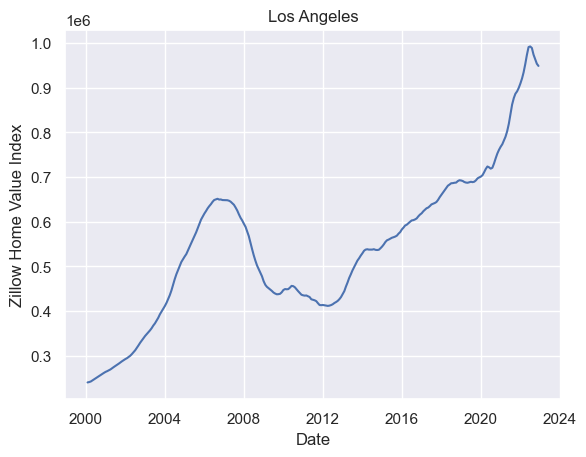

In [8]:
LA_timeseries = sns.lineplot(x = "date", y = "LosAngelesCA", data = LA_df)
LA_timeseries.set(xlabel = "Date", ylabel = "Zillow Home Value Index", title = "Los Angeles")

In [9]:
NYC_df = full_df[['NewYorkNY', 'MORTGAGE30US', 'MedianCPI', 'HomesForSale', 
                  'HomesSold', 'NewYorkUnemployment']].copy()

In [10]:
NYC_df.head()

,NewYorkNY,MORTGAGE30US,MedianCPI,HomesForSale,HomesSold,NewYorkUnemployment
date,,,,,,
2000-01-31,226266.0,8.25,2.785584,82.0,67.0,5.1
2000-02-29,227618.0,8.31,3.416809,79.0,78.0,5.0
2000-03-31,228829.0,8.23,2.276901,86.0,88.0,4.8
2000-04-30,231213.0,8.13,2.853534,80.0,78.0,4.1
2000-05-31,233418.0,8.62,3.142535,84.0,77.0,4.3


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Zillow Home Value Index'),
 Text(0.5, 1.0, 'New York City')]

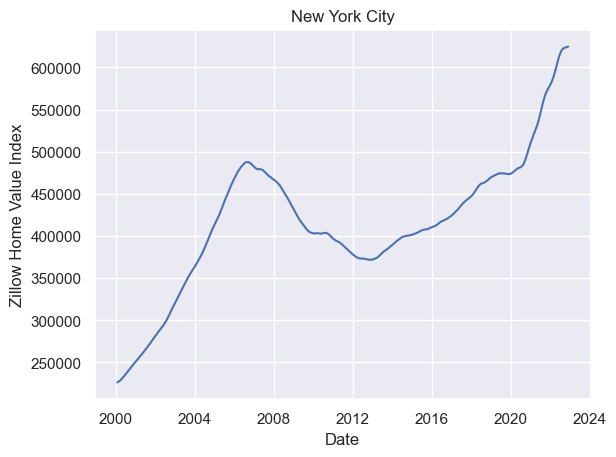

In [11]:
NYC_timeseries = sns.lineplot(x = "date", y = "NewYorkNY", data = NYC_df)
NYC_timeseries.set(xlabel = "Date", ylabel = "Zillow Home Value Index", title = "New York City")

In [12]:
NC_df = full_df[['RaleighNC', 'MORTGAGE30US', 'MedianCPI', 'HomesForSale', 
                 'HomesSold', 'RaleighUnemployment']].copy()

In [13]:
NC_df.head()

,RaleighNC,MORTGAGE30US,MedianCPI,HomesForSale,HomesSold,RaleighUnemployment
date,,,,,,
2000-01-31,176753.0,8.25,2.785584,82.0,67.0,2.5
2000-02-29,176909.0,8.31,3.416809,79.0,78.0,2.6
2000-03-31,177351.0,8.23,2.276901,86.0,88.0,2.4
2000-04-30,178077.0,8.13,2.853534,80.0,78.0,2.0
2000-05-31,179033.0,8.62,3.142535,84.0,77.0,2.5


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Zillow Home Value Index'),
 Text(0.5, 1.0, 'Raleigh, North Carolina')]

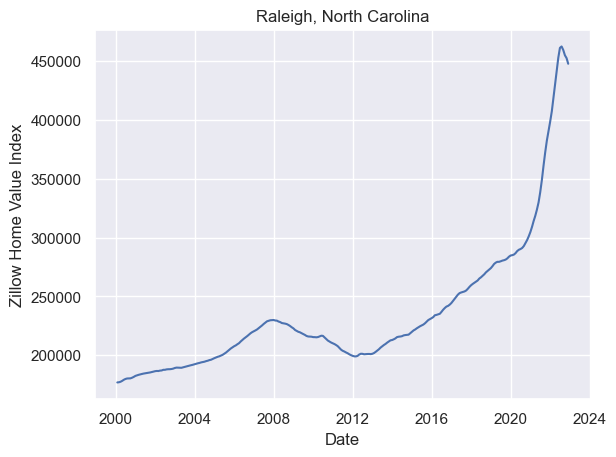

In [14]:
NC_timeseries = sns.lineplot(x = "date", y = "RaleighNC", data = NC_df)
NC_timeseries.set(xlabel = "Date", ylabel = "Zillow Home Value Index", title = "Raleigh, North Carolina")

In [15]:
OKC_df = full_df[['OklahomaCityOK', 'MORTGAGE30US', 'MedianCPI', 'HomesForSale', 
                  'HomesSold', 'OklahomaCityUnemployment']].copy()

In [16]:
OKC_df.head()

,OklahomaCityOK,MORTGAGE30US,MedianCPI,HomesForSale,HomesSold,OklahomaCityUnemployment
date,,,,,,
2000-01-31,91918.0,8.25,2.785584,82.0,67.0,2.9
2000-02-29,92156.0,8.31,3.416809,79.0,78.0,3.0
2000-03-31,92378.0,8.23,2.276901,86.0,88.0,2.8
2000-04-30,92742.0,8.13,2.853534,80.0,78.0,2.2
2000-05-31,93124.0,8.62,3.142535,84.0,77.0,2.7


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Zillow Home Value Index'),
 Text(0.5, 1.0, 'Oklahoma City, Oklahoma')]

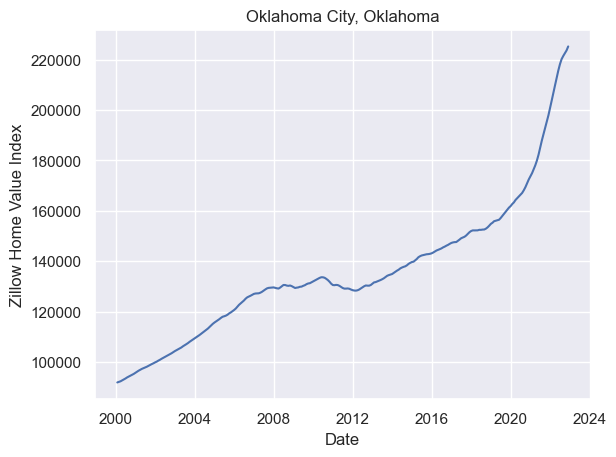

In [17]:
OKC_timeseries = sns.lineplot(x = "date", y = "OklahomaCityOK", data = OKC_df)
OKC_timeseries.set(xlabel = "Date", ylabel = "Zillow Home Value Index", title = "Oklahoma City, Oklahoma")

In [18]:
SLC_df = full_df[['SaltLakeCityUT', 'MORTGAGE30US', 'MedianCPI', 'HomesForSale', 
                  'HomesSold', 'SaltLakeCityUnemployment']].copy()

In [19]:
SLC_df.head()

,SaltLakeCityUT,MORTGAGE30US,MedianCPI,HomesForSale,HomesSold,SaltLakeCityUnemployment
date,,,,,,
2000-01-31,190020.0,8.25,2.785584,82.0,67.0,3.1
2000-02-29,190141.0,8.31,3.416809,79.0,78.0,3.4
2000-03-31,190386.0,8.23,2.276901,86.0,88.0,3.3
2000-04-30,190866.0,8.13,2.853534,80.0,78.0,2.9
2000-05-31,193543.0,8.62,3.142535,84.0,77.0,3.0


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Zillow Home Value Index'),
 Text(0.5, 1.0, 'Salt Lake City, Utah')]

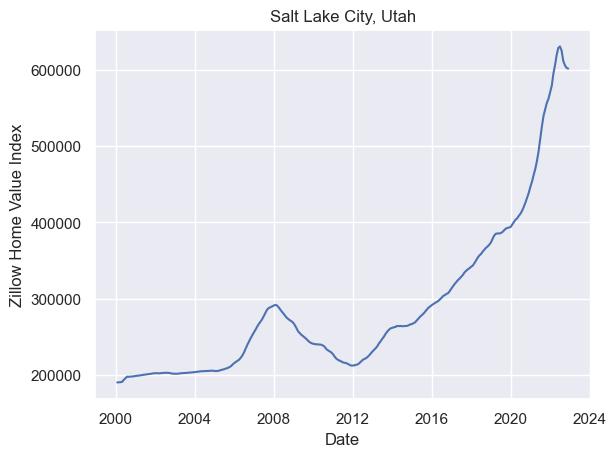

In [20]:
SLC_timeseries = sns.lineplot(x = "date", y = "SaltLakeCityUT", data = SLC_df)
SLC_timeseries.set(xlabel = "Date", ylabel = "Zillow Home Value Index", title = "Salt Lake City, Utah")

In [21]:
SLC_df.shape

(275, 6)

# Multivariate Time Series Analysis

In [22]:
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic, bic

**Step 1**: Visualize the time series to check for stationarity. Observe any trend, cyclic, seasonality behaviors.

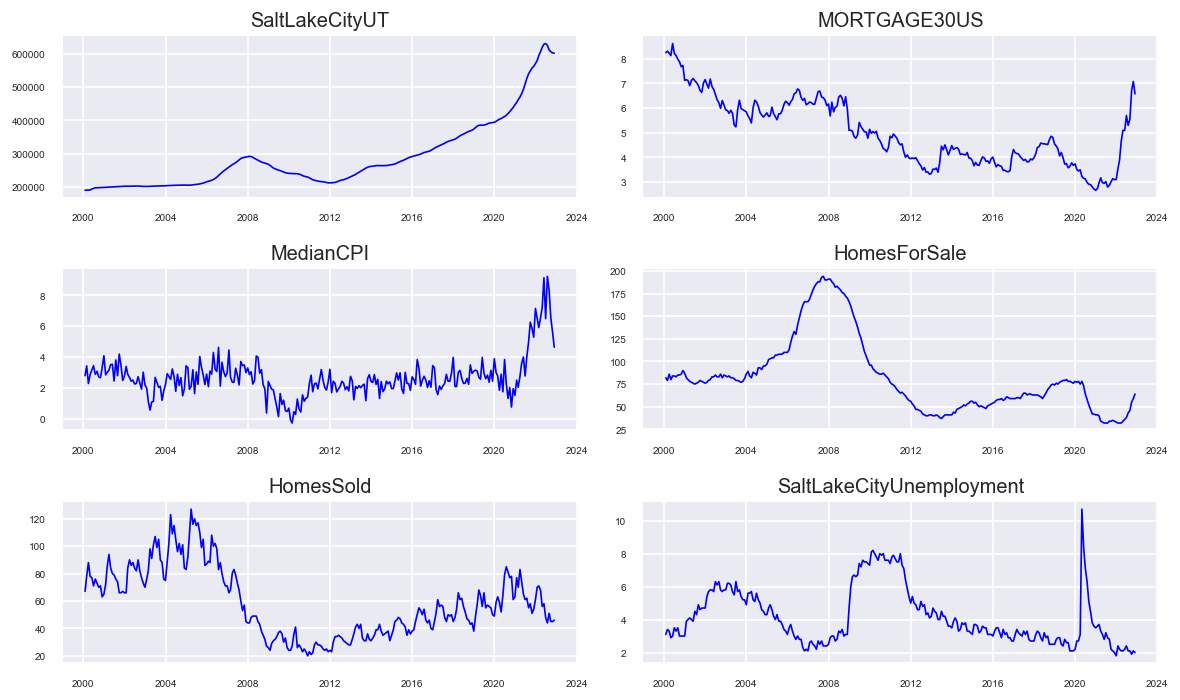

In [23]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, dpi = 120, figsize = (10,6))
for i, ax in enumerate(axes.flatten()):
    data = SLC_df[SLC_df.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    ax.set_title(SLC_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

`SLC_df` Observations:

- Zillow Home Value Index is the only variable showing distinct trend in a positive fashion.
- `MedianCPI` looks to be the closest to stationary, but is not. Showing signs of seasonality with a distinct shock around 2021. 
- `HomesSold` shows seasonality and follows a similar pattern to `HomesForSale` however that is smoother. 
- `SaltLakeCityUnemployment` shows cyclic behaviors with a spike in 2021. 

**Step 2**: Use the Augmented Dickey-Fuller Test to test for stationarity.

- $H_0$: $y_{i}$ = There is a unit root.

- $H_a$: $y_{i}$ = There is no unit root.

_Where ${y}$ is represents a variable in the dataset and ${i}$ indicates which variable with a significance level of  $\alpha $ $= 0.05$._


Note: If there is a unit root, there is presence of serial correlation indicating the timeseries in question is not stationary.

In [24]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries, signif = 0.05, name = ''):
    
    dftest = adfuller(timeseries, autolag = 'BIC')
    output = {'test_statistic':round(dftest[0], 4), 'pvalue':round(dftest[1], 4), 'n_lags':round(dftest[2], 2), 'n_obs':dftest[3]}
    p_value = output['pvalue']
    
    
    def adjust(val, length = 6): return str(val).ljust(length)
    
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key, val in dftest[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')
        
    if p_value <= signif:
        print(f" P-Value = {p_value}. Reject Null Hypothesis.")
        print(f" Series is Stationary.")
    else:
        print(f" P-Value = {p_value}. Fail to reject the Null Hypothesis.")
        print(f" Series is Non-Stationary.")

In [25]:
for name, column in SLC_df.iteritems():
    adf_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SaltLakeCityUT" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.2158
 No. Lags Chosen       = 12
 Critical value 1%     = -3.456
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 P-Value = 0.9961. Fail to reject the Null Hypothesis.
 Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "MORTGAGE30US" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1832
 No. Lags Chosen       = 0
 Critical value 1%     = -3.454
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 P-Value = 0.2124. Fail to reject the Null Hypothesis.
 Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "MedianCPI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non

Note: All time series dependent and independent variables are Non-Stationary. We will need to use differencing to transform each time series stationary. 

**Step 3**: Test for cointegration to check for two or more time series in the dataset have a statistically long term relationship. The data needs to be non-stationary to perform this test. 

In [26]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(SLC_df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
SaltLakeCityUT ::  111.89    > 83.9383   =>   True
MORTGAGE30US ::  60.5      > 60.0627   =>   True
MedianCPI ::  34.4      > 40.1749   =>   False
HomesForSale ::  19.99     > 24.2761   =>   False
HomesSold ::  7.65      > 12.3212   =>   False
SaltLakeCityUnemployment ::  2.16      > 4.1296    =>   False


Observations: The only variables indicating the precense of a statistically significant connect between two or more time series are the Zillow Home Value Index and the `Mortgage30US`. This indicates that we might only want our model to contain `Mortgage30US`.

**Step 4**: Make the time-series data stationary by taking the first difference. 

In [27]:
df_differenced = SLC_df.diff().dropna()

Perform the ADF test to check if the time series data is stationary which was defined in Step 2.

In [28]:
for name, column in df_differenced.iteritems():
    adf_test(column, name = column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SaltLakeCityUT" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.0379
 No. Lags Chosen       = 11
 Critical value 1%     = -3.456
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 P-Value = 0.0. Reject Null Hypothesis.
 Series is Stationary.


    Augmented Dickey-Fuller Test on "MORTGAGE30US" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -15.0959
 No. Lags Chosen       = 0
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 P-Value = 0.0. Reject Null Hypothesis.
 Series is Stationary.


    Augmented Dickey-Fuller Test on "MedianCPI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    

**Step 5**: Test Causality using Granger's Causality Test. This test requires the data to be stationary.

Null Hypothesis: The past values of the time series (30 Year Fixed Mortage Rate, Median CPI, Homes for Sale, Homes Sold, Unemployment Rate) do not cause the other series (Zillow Home Value Index).

Alternative Hypothesis: They do influence the Zillow Home Value Index.

In [29]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag = 12
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test = 'ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns = variables, index = variables)
    
    for c in df.columns:
        
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df 

In [30]:
grangers_causation_matrix(df_differenced, variables = df_differenced.columns)  

,SaltLakeCityUT_x,MORTGAGE30US_x,MedianCPI_x,HomesForSale_x,HomesSold_x,SaltLakeCityUnemployment_x
SaltLakeCityUT_y,1.0000,0.0031,0.1179,0.2247,0.0906,0.1220
MORTGAGE30US_y,0.0000,1.0000,0.0010,0.7144,0.0165,0.7039
MedianCPI_y,0.0000,0.7361,1.0000,0.0446,0.7194,0.0011
HomesForSale_y,0.0874,0.0000,0.1682,1.0000,0.1955,0.0004
HomesSold_y,0.1050,0.0074,0.1576,0.2206,1.0000,0.0000
SaltLakeCityUnemployment_y,0.0208,0.8289,0.4374,0.3531,0.0000,1.0000


Observations from SLC Dataframe:

- What variables influence the Zillow Home Value Index in Salt Lake City?
    - `Mortgage30US`: 0.0126
    
- What variables influence the Mortgage Rate?
     - `MedianCPI`
     - `HomesSold`
     
- What variables influence the Median CPI?
    - Zillow Home Index
    - `HomesForSale`
    - `SaltLakeCityUnemployment`

- What variables influence the Homes for sale?
     - `Mortgage30US`
     - `SaltLakeCityUnemployment`

- What variables influence the Homes sold?
    - `Mortgage30US`
    - `SaltLakeCityUnemployment`

- What variables influence the Unemployment rate?
    - Zillow Home Index
    - `HomesSold`

**Step 6**: Split the data. 

In [31]:
test_obs = 12
train_df = df_differenced[:-test_obs]
test_df = df_differenced[-test_obs:]

**Step 5**: Select the order `p` of the VAR `d` of 1 model ("VAR in differences").

In [32]:
model = VAR(train_df)
p = model.select_order(maxlags = 12)
p.summary()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,17.02,17.11,2.471e+07,17.06
1,14.24,14.83*,1.533e+06,14.48*
2,14.07,15.16,1.285e+06,14.51
3,14.04,15.65,1.254e+06,14.69
4,13.87,15.98,1.056e+06,14.72
5,13.95,16.57,1.153e+06,15.00
6,13.83*,16.95,1.025e+06*,15.09
7,13.94,17.58,1.162e+06,15.41
8,13.97,18.11,1.199e+06,15.63
9,13.94,18.58,1.179e+06,15.81


According to [Forecasting Principles & Practice](https://otexts.com/fpp3/VAR.html), one should use BIC when evaluating a multivariate model so we will select order p 1. 

**Step 6**: Fit the model on order `p` of 1.

In [33]:
result = model.fit(1)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 10, Feb, 2023
Time:                     12:19:23
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    14.9511
Nobs:                     261.000    HQIC:                   14.6080
Log likelihood:          -4056.32    FPE:                1.75424e+06
AIC:                      14.3775    Det(Omega_mle):     1.49666e+06
--------------------------------------------------------------------
Results for equation SaltLakeCityUT
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                              81.169221        61.105367            1.328           0.184
L1.SaltLakeCityUT                   0.957659         0.019868           48.200           0

**Step 7**: Check for Serial Coorelation of Residuals using Durbin Watson. 

In [34]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(result.resid)

for col, val in zip(train_df.columns, out):
    print(col, ':', round(val, 2))

SaltLakeCityUT : 1.64
MORTGAGE30US : 2.03
MedianCPI : 2.17
HomesForSale : 2.2
HomesSold : 2.1
SaltLakeCityUnemployment : 2.02


Since all the values are close to 2, there is no significant serial correlation suggesting that all the variability is captured in the model.

**Step 8**: Forecast using VAR.

In [35]:
# Get the lag order
lag_order = result.k_ar
print(lag_order)

1


In [36]:
lagged_values = train_df.values[-lag_order:]
lagged_values

array([[ 5.23100000e+03, -4.00000000e-02, -5.79941304e-01,
        -1.00000000e+00,  3.00000000e+00, -1.00000000e-01]])

In [37]:
pred = result.forecast(y = lagged_values, steps = 12)
df_forecast = pd.DataFrame(data = pred, index = test_df.index[:test_obs], columns = test_df.columns + '_1d')
df_forecast

,SaltLakeCityUT_1d,MORTGAGE30US_1d,MedianCPI_1d,HomesForSale_1d,HomesSold_1d,SaltLakeCityUnemployment_1d
date,,,,,,
2021-12-31,5043.127497,-0.001770,0.392480,-0.021137,-0.872001,-0.052511
2022-01-31,4941.210654,-0.000725,-0.046287,0.374454,-0.313772,-0.056160
2022-02-28,4797.898291,-0.006120,0.143050,0.551070,-0.577410,-0.053694
2022-03-31,4671.468465,-0.005314,0.057561,0.599300,-0.439253,-0.055852
2022-04-30,4542.217227,-0.006733,0.091516,0.608043,-0.483607,-0.053695
2022-05-31,4420.802799,-0.007013,0.072845,0.592674,-0.445500,-0.052534
2022-06-30,4303.225072,-0.007686,0.077224,0.570520,-0.442815,-0.050651
2022-07-31,4191.343717,-0.008122,0.071592,0.544690,-0.424866,-0.049020
2022-08-31,4084.204188,-0.008617,0.070479,0.518538,-0.414196,-0.047313


**Step 8**: Plot the forecast residuals.

    - Plot the autocorrelation of residuals. (ACF)
    - Plot residuals overtime.
    - Plot residuals vs. forecasts vs. actuals.

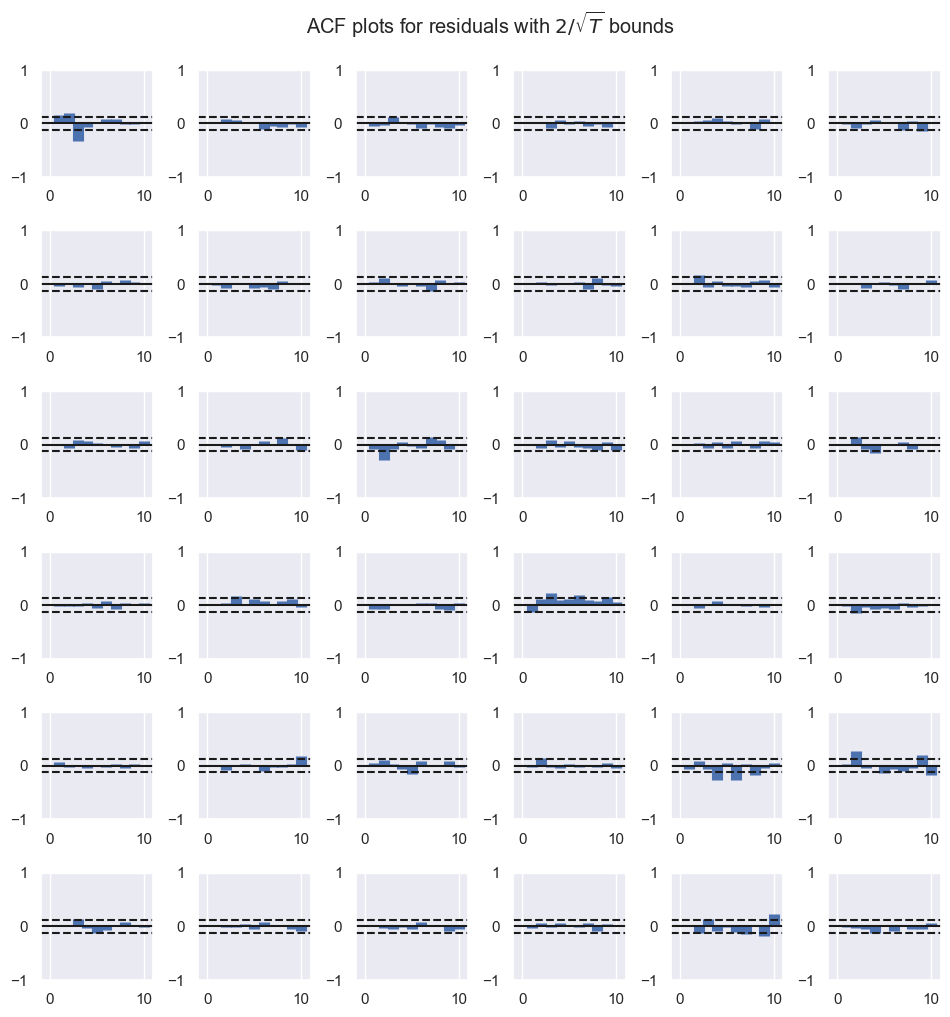

In [38]:
result.plot_acorr()
plt.subplots_adjust(top = 0.92, bottom = 0.01, hspace = 0.50, wspace = 0.4)

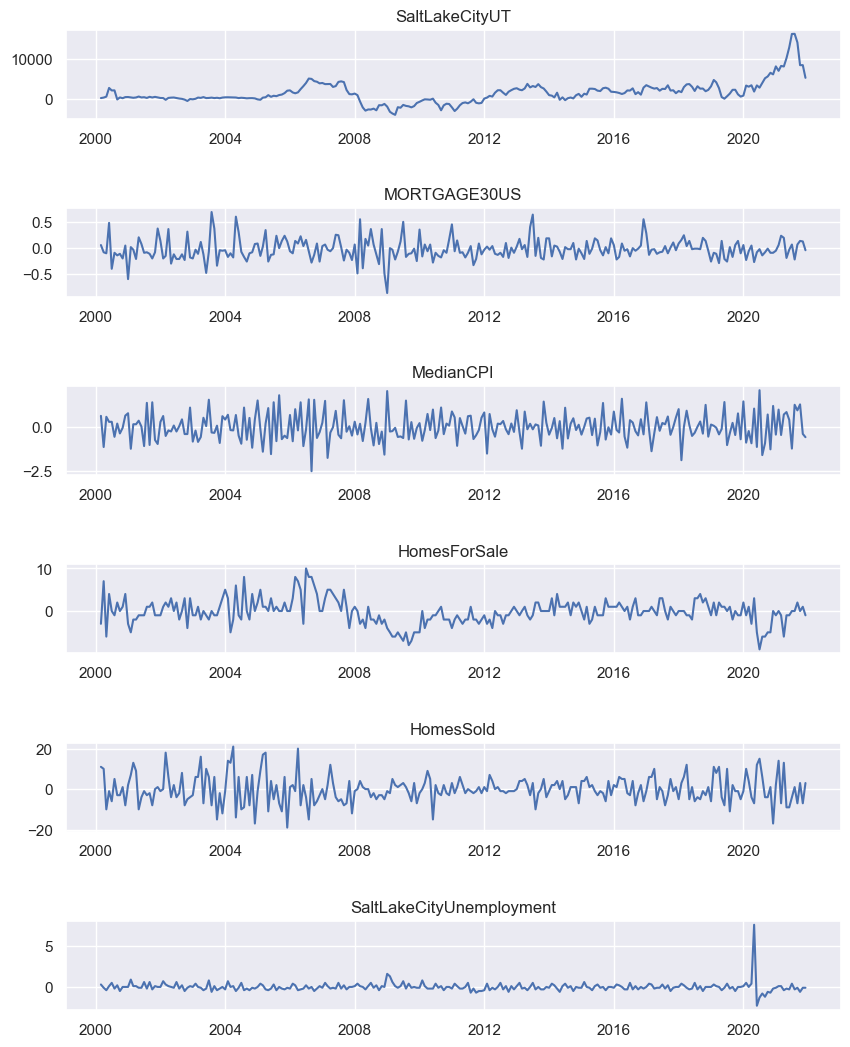

In [39]:
plt.rcParams["figure.figsize"] = [7, 5]
result.plot()
plt.subplots_adjust(top = 0.99, bottom = 0.01, hspace = 1, wspace = 0.4)

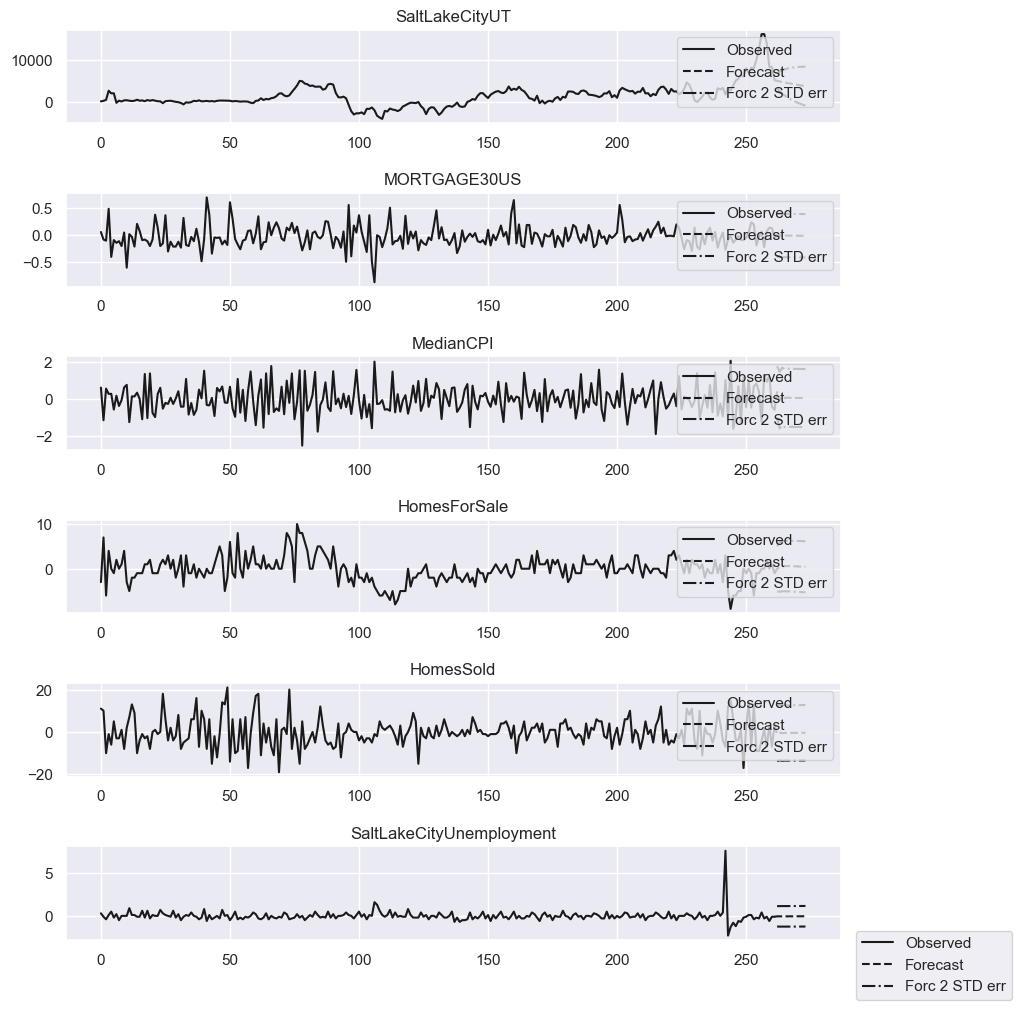

In [40]:
result.plot_forecast(12)
plt.subplots_adjust(top = 0.92, bottom = 0.01, hspace = 0.75, wspace = 0.4)
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)

**Step 9**: Impulse response analysis.

Impulse responses show how each variable impacts the system (shocks) over time. 

In [41]:
irf = result.irf(12)

In [42]:
SLC_df.columns

Index(['SaltLakeCityUT', 'MORTGAGE30US', 'MedianCPI', 'HomesForSale',
       'HomesSold', 'SaltLakeCityUnemployment'],
      dtype='object')

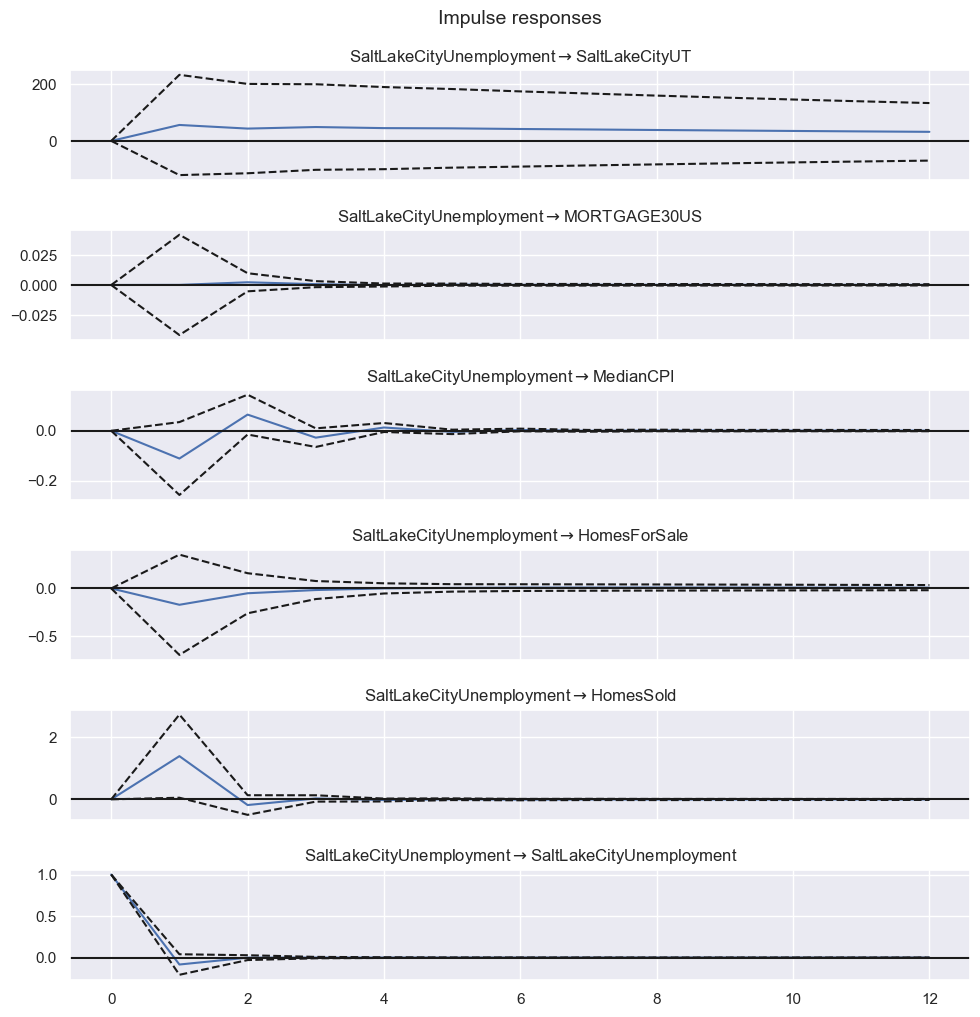

In [43]:
irf.plot(impulse = 'SaltLakeCityUnemployment', orth = False)
plt.subplots_adjust(top = 0.92, bottom = 0.01, hspace = 0.45, wspace = 0.4)

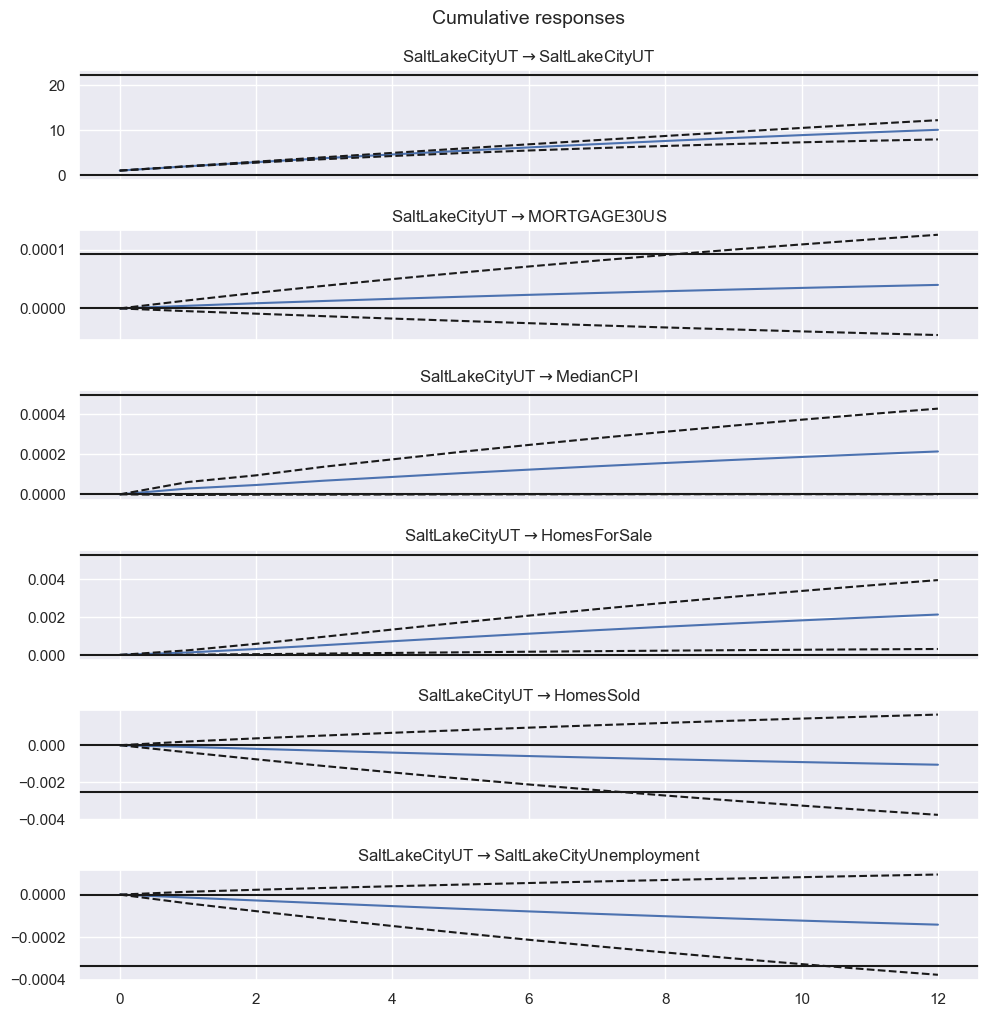

In [44]:
irf.plot_cum_effects(impulse = 'SaltLakeCityUT', orth = False)
plt.subplots_adjust(top = 0.92, bottom = 0.01, hspace = 0.45, wspace = 0.4)

Forecast error variance decomposition (FEVD) decomposes the variance of the forecast error into the contributions from specific shocks. The matrix and the plots shows the contributions from each individual shock as a portion of the total shock in that specific time period.

Note: All the FEVD values are extremely low, indicating that each individual shock has minimal short term and long term impacts.

In [45]:
fevd = result.fevd(12)

In [46]:
fevd.summary()

FEVD for SaltLakeCityUT
      SaltLakeCityUT  MORTGAGE30US  MedianCPI  HomesForSale  HomesSold  SaltLakeCityUnemployment
0           1.000000      0.000000   0.000000      0.000000   0.000000                  0.000000
1           0.992274      0.002853   0.002372      0.001727   0.000001                  0.000773
2           0.989539      0.003620   0.002072      0.003895   0.000018                  0.000856
3           0.987318      0.003890   0.002177      0.005604   0.000023                  0.000987
4           0.985881      0.004030   0.002131      0.006884   0.000026                  0.001048
5           0.984804      0.004111   0.002133      0.007826   0.000028                  0.001098
6           0.984024      0.004165   0.002120      0.008531   0.000029                  0.001131
7           0.983426      0.004203   0.002115      0.009068   0.000030                  0.001158
8           0.982964      0.004232   0.002110      0.009487   0.000031                  0.001177
9     

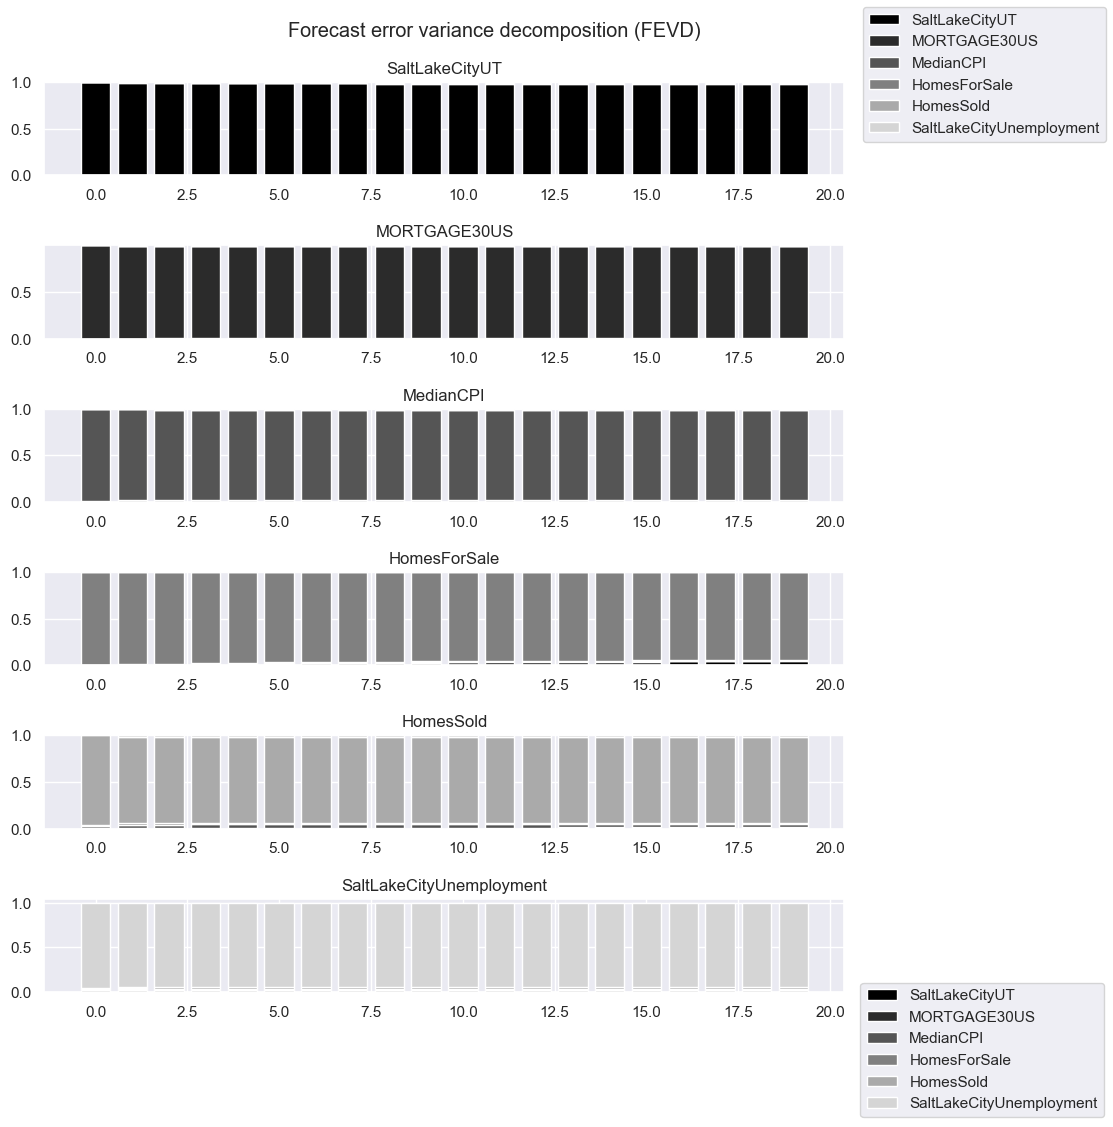

In [47]:
result.fevd(20).plot()
plt.subplots_adjust(top = 0.92, bottom = 0.01, hspace = 0.75, wspace = 0.4)
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)

**Step 10**: Test for granger causality.

    - Note: None of the exogenous variables that were added does not have any impact ('Granger causality) to the Zillow Home Value Index.

In [48]:
granger = result.test_causality('SaltLakeCityUT', ['MORTGAGE30US', 'MedianCPI', 'HomesForSale',
       'HomesSold', 'SaltLakeCityUnemployment'], kind = 'f')

In [49]:
print(granger)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: ['MORTGAGE30US', 'MedianCPI', 'HomesForSale', 'HomesSold', 'SaltLakeCityUnemployment'] do not Granger-cause SaltLakeCityUT: fail to reject at 5% significance level. Test statistic: 0.883, critical value: 2.220>, p-value: 0.492>


**Step 11**: Test for normality on the residuals.

Note: The residuals are not normally distributed. May need to consider transforming.

In [50]:
normal_test = result.test_normality()

In [51]:
print(normal_test)

<statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults object. H_0: data generated by normally-distributed process: reject at 5% significance level. Test statistic: 86791.904, critical value: 21.026>, p-value: 0.000>


**Step 12**: Invert the differencing to get the real forecast.

In [52]:
df_forecast['SaltLakeCityUT_Forecast'] = SLC_df['SaltLakeCityUT'].iloc[-test_obs-1] + df_forecast['SaltLakeCityUT_1d'].cumsum()

df_forecast['MORTGAGE30US_Forecast'] = SLC_df['MORTGAGE30US'].iloc[-test_obs-1] + df_forecast['MORTGAGE30US_1d'].cumsum()

df_forecast['MedianCPI_Forecast'] = SLC_df['MedianCPI'].iloc[-test_obs-1] + df_forecast['MedianCPI_1d'].cumsum()

df_forecast['HomesForSale_Forecast'] = SLC_df['HomesForSale'].iloc[-test_obs-1] + df_forecast['HomesForSale_1d'].cumsum()

df_forecast['HomesSold_Forecast'] = SLC_df['HomesSold'].iloc[-test_obs-1] + df_forecast['HomesSold_1d'].cumsum()

df_forecast['SaltLakeCityUnemployment_Forecast'] = SLC_df['SaltLakeCityUnemployment'].iloc[-test_obs-1] + df_forecast['SaltLakeCityUnemployment_1d'].cumsum()

**Step 13**: Plot forecasts.

In [53]:
test_actuals = SLC_df[-test_obs:]

<AxesSubplot: xlabel='date'>

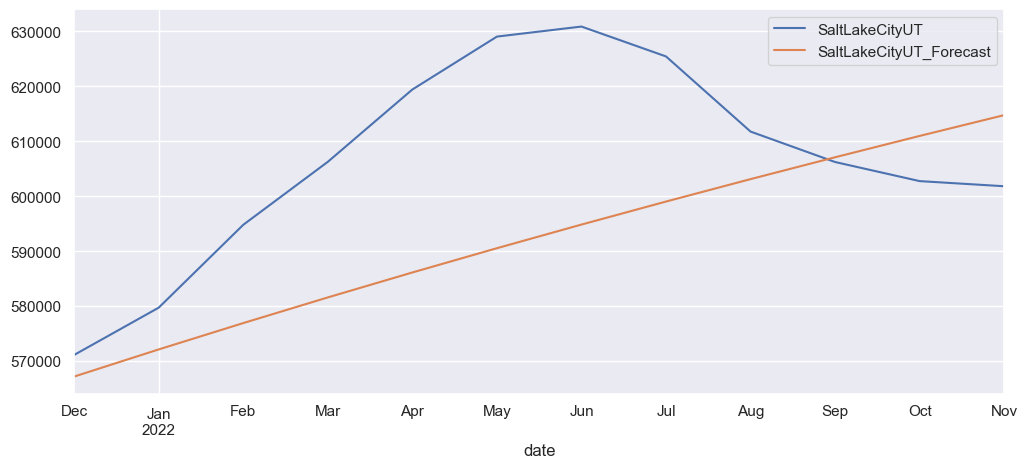

In [54]:
test_actuals['SaltLakeCityUT'].plot(figsize = (12, 5), legend = True)
df_forecast['SaltLakeCityUT_Forecast'].plot(legend = True)

#### Sources:

- For educational background: 
    - [Forecasting: Principles and Practice Section 12.4](https://otexts.com/fpp3/VAR.html)
    - [PennState Eberly College of Science STAT 510 Applied Time Series Analysis 11.2](https://online.stat.psu.edu/stat510/lesson/11/11.2)
    - [Aptech Blog Introduction to the Fundamentals of Vector Autoregressive Models](https://www.aptech.com/blog/introduction-to-the-fundamentals-of-vector-autoregressive-models/#:~:text=with%20VAR%20models.-,What%20is%20a%20vector%20autoregressive%20model%3F,other%20variables%20in%20the%20system.)
    
- For code: 
    - [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/08/vector-autoregressive-model-in-python/)
    - [Machine Learning Plus](https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/)